## The Shortest Path Problem

Another special case of minimal-cost network-flow problem.

$$\text{min} \sum_{(i, j)\in{A}} c_{ij} x_{ij}$$

$\text{subject to}$

\begin{equation}
  \sum_{(i, j)\in{A}} x_{ij} - \sum_{(j, i)\in{A}} x_{ji}=\left\{
  \begin{array}{@{}ll@{}}
    1, & \text{if}\ i \text{ is the origin node} \\
    -1, & \text{if}\ i \text{ is the destination node} \\
    0, & \text{otherwise}
  \end{array}\right.
  \quad \forall{i} \in{N}
\end{equation}

$$x_{ij} \in \{0, 1\} \quad \forall{(i, j)} \in{A}$$

Can be solved using LP but Dijkstra's algorithm is more efficient.

### Example problem

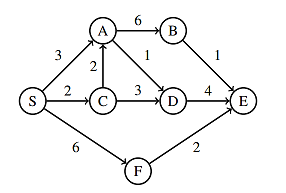

**Shortest paths from S to all other nodes**

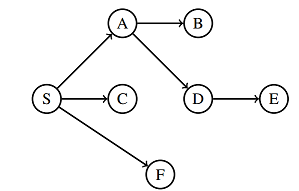

In [1]:
network_data = readcsv("graph.csv", header=true)
data = network_data[1]
header = network_data[2]

start_nodes = round.(Int64, data[:, 1])
end_nodes = round.(Int64, data[:, 2])
c = data[:, 3] # cost

origin = 1 # origin node
destination = 5 # destination node

num_nodes = max(maximum(start_nodes), maximum(end_nodes))
num_links = length(start_nodes)

letter_nodes = ["S" "A" "B" "C" "D" "E" "F"]
data = Dict()
data["start nodes"] = [letter_nodes[i] for i in start_nodes]
data["end nodes"] = [letter_nodes[i] for i in end_nodes]
data["cost"] = c
data

Dict{Any,Any} with 3 entries:
  "cost"        => [3.0, 2.0, 6.0, 6.0, 1.0, 1.0, 2.0, 3.0, 4.0, 2.0]
  "end nodes"   => String["A", "C", "F", "B", "D", "E", "A", "D", "E", "E"]
  "start nodes" => String["S", "S", "S", "A", "A", "B", "C", "C", "D", "F"]

## Dijkstra's Algorithm

Dijkstra's Algorithm implementation.

Dijkstra's algorithm is a one-to-all algorithm, i.e. finds shortest paths from a single origin to all other nodes.

- **Step 0.** Initialize $w_1 = 0$ and $X = \{\}$ 
- **Step 1.** When $\bar{X} = N \setminus X$, find the set $(X, \bar{X}) = \{(i, j) : i \in{X}, j \in{\bar{X}}\}$
- **Step 2.** Find a link $(p, q)$ such that

$$w_p + c_{pq} = min \Big\{w_i + c_{ij} : (i, j) \in{(X, \bar{X})} \text{ and } (i, j) \in{A}\Big\}$$

- **Step 3.** Set $w_q = w_p + c_{pq}$ and add the node $q$ to the set $X$
- **Step 4.** If the new $\bar{X} = N \setminus X$ is an empty set, stop. Otherwise, got to **Step 1** and repeat

$\text{where}$

$w_i$ - distance to the node $i$
<br>
$X$ - set of visited nodes
<br>
$\bar{X}$ - set of unvisited nodes
<br>
$N$ - set of all nodes
<br>
$A$ - set of all links (edges)

In [2]:
include("dijkstra.jl")

using DijkstrasAlgorithm

In [8]:
cost, path = dijkstras_algorithm(1, 5, start_nodes, end_nodes, c)

println("The distance from node $(letter_nodes[origin]) to node $(letter_nodes[destination]) is $cost")

print("The shortest path: ")
for i in path
    print(letter_nodes[i], " ")
end

The distance from node S to node D is 4.0
The shortest path: S A D 

## Using LightGraphs package

In [4]:
using LightGraphs

# Extracts binary x vector
function get_shortest_x(path, start_nodes, end_nodes, origin, destination)
    x = zeros(Int, length(start_nodes))
    
    for i = 1:length(path)-1
        start = path[i]
        end_ = path[i+1]
        
        for j = 1:length(start_nodes)
            if start_nodes[j] == start && end_nodes[j] == end_
                x[j] = 1
                break
            end
        end
    end
    
    return x
end


graph = Graph(num_nodes)
distance_matrix = Inf * ones(num_nodes, num_nodes)

for i = 1:num_links
    add_edge!(graph, start_nodes[i], end_nodes[i])
    distance_matrix[start_nodes[i], end_nodes[i]] = c[i]
end

state = dijkstra_shortest_paths(graph, origin, distance_matrix)

# Returns indices of the nodes in the shortest path
path = enumerate_paths(state, destination)
println("The shortest path is: ", path)

x = get_shortest_x(path, start_nodes, end_nodes, origin, destination)
println("x vector: ", x)

println("Cost is $(state.dists[destination])")
println("Cost is $(dot(c, x))")
println("Cost is $(c' * x)")

The shortest path is: [1, 2, 5]
x vector: [1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Cost is 4.0
Cost is 4.0
Cost is 4.0
